# NumPy

NumPy is a Python scientific computing package, which allows you to do large-scale multi-dimensional array operations easily and efficiently, and provides many Mathematical and Scientific libraries to help you perform scientific computations easily.

In [1]:
import numpy as np

## N-dimensional Array Basics

```np.array()``` creates an n-dimensional array. The elements must be of same type.

For one dimensional array, pass a Python list (or any sequence type) into the constructor. For higher dimensions, use a nested list.

In [ ]:
x = np.array([1, 2, 3])
print(type(x))  # <class 'numpy.ndarray'>

y = np.array([[1, 2, 3], 
              [-1, 4, 7]])

In NumPy, a dimension is called an axis.

```np.array([1, 2, 3])``` has one axis (axis 0) with 3 elements.

```np.array([[1, 2, 3], [-1, 4, 7]])``` has two axes. Axis 0 has 2 elements (rows), axis 1 has 3 elements (columns).

In [ ]:
x = np.array([[[0, 1, 2, 3],
               [4, 5, 6, 7]],

              [[0, 1, 2, 3],
               [4, 5, 6, 7]],
               
              [[0 ,1 ,2, 3],
               [4, 5, 6, 7]]])

print(x.ndim)    ## 3
print(x.shape)   ## (3, 2, 4)
print(x.size)    ## 24
print(x.dtype)   ## int64

## NumPy array factory methods

| Methods                                       | Actions                                                           |
| :-------------------------------------------- | :---------------------------------------------------------------- |
| ```np.zeros(dim)```                           | Create a new array of dim dimensions filled with 0s.              |
| ```np.ones(dim)```                            | Create a new array of dim dimensions filled with 1s.              |
| ```np.full(dim, num)```                       | Create a new array of dim dimensions filled with num.             |
| ```np.empty(dim)```                           | Create a new array of dim dimensions filled with random numbers.  |
| ```np.eye(dim)``` /  ```np.identity(dim)```   | Create a new identity matrix of dim dimensions.                   |

In [ ]:
x = np.zeros((2, 3))
x = np.ones((2, 3))     # 2 rows, 3 columns
x = np.full((2, 3), 9)
x = np.empty((2, 3))
x = np.eye(3)
x = np.identity(3)

```np.arange(start, stop, step)``` is equivalent to Python's ```range()```.

For non-integer arguments, using ```np.linspace(start_inclusive, end_inclusive, num=interval)``` is preferred due to floating point precision issues.

In [ ]:
x = np.arange(3, 11, 2)
x = np.linspace(0, 10, num=5)

```np.zeroes_like(arr)```, ```np.ones_like(arr)```, ```np.full_like(arr)```, ```np.empty_like(arr)``` creates the respective arrays with the same shape and type as arr.

In [ ]:
x = np.array([[1, 2, 3], 
              [4, 5, 6]])
print(x.shape)  # (2, 3)

x_zero = np.zeros_like(x)
x_ones = np.ones_like(x)
x_full = np.full_like(x, 3)
x_empty = np.empty_like(x)

## Arithmetic Operations

Elementwise operations are done like vector operations (vectorisation).

In [ ]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

# Elementwise addition and subtraction
print(x + 2)    # [3 4 5 6]
print(x - y)    # [1 1 1 1]

# Elementwise boolean operations
print(x < 3)        # [ True  True False False]
print(x + y > 5)    # [False False False  True]

In [ ]:
a = np.array([[1, 2], 
              [3, 4]])
b = np.array([[2, 3],
              [4, 5]])

# Multiplying an array with a scalar
print(a * 3)    # [[ 3  6]
                #  [ 9 12]]

# Elementwise multiplication (NOT Matrix Multiplication)
print(a * b)    # [[ 2  6]
                #  [12 20]]

# Elementwise division
print(a / b)    # [[0.5        0.66666667]
                #  [0.75       0.8       ]]

In [ ]:
a = np.array([[1, 2], 
              [3, 4]])
b = np.array([[2, 3], 
              [4, 5]])

# Matrix multiplications
print(a @ b)
print(np.matmul(a, b))  # [[10 13]
                        #  [22 29]]

In [ ]:
x = np.array([1, 2, 3])
y = np.array([2, 3, 4])

# Dot product
print(np.dot(x, y)) # 20

## Indexing and Slicing

### Integer array indexing

1D arrays are accessed just like a Python list with []. Slicing works as well.

Miltidimensional arrays are accessed by separating indicies with a comma. While you can also access multidimensional arrays like Python lists (e.g. y\[0]\[1]), this is much slower than the alternate approach (y\[0, 1]).

In [ ]:
x = np.array([1, 2, 3, 4, 5])

x[0]
x[-1]
x[2:4]
x[:3]

In [ ]:
y = np.array([[1, 2, 3, 5], 
              [-1, 4, 7, 9]]) 

y[0,1]
y[-1,-2]
y[1:3, :-1] # (2nd~3rd row, 1st~2nd to last col)
y[:,:]
y[0]

In [ ]:
y = np.array([[1, 2, 3, 5], 
              [-1, 4, 7, 9]])

# (row 1, col 3; and row 0, col 2)
print(y[[1, 0], [3, 2]])    # [9 3]

### Boolean indexing

You can also access elements in an array with a boolean array as its indicies.

It is mainly useful for filtering out the arrays.

In [ ]:
x = np.array([1, 2, 3, 4, 5])
condition = np.array([True, False, False, True, True])

# Only keep elements that match to True
print(x[condition]) # [1 4 5]

In [ ]:
y = np.array([[1, 2, 3, 5], 
              [-1, 4, 7, 9]])

print(y < 4)    # [[ True  True  True False]
                #  [ True False False False]]
print(y[y < 4]) # [ 1  2  3 -1]

# The condition can be complex
y[(y < 4) & (y > 1)]
y[np.logical_and(y < 4, y > 1)]

## Reshaping arrays

### Flattening an array

```arr.flatten()``` creates a new flattened array with a new copy of the elements.

```arr.ravel()``` creates a new flattened array with the reference to the elements.

In [ ]:
x = np.array([[0, 1, 2, 3],
              [4, 5, 6, 7],
              [-6, -5, -4, -3]])

v = x.flatten()
v[0] = 10
print(x[0,0] == v[0])   # False

v = x.ravel()
v[0] = 10
print(x[0,0] == v[0])   # True

In [ ]:
x = np.array([[0, 1, 2, 3],
              [4, 5, 6, 7],
              [-6, -5, -4, -3]])

# Transposing an array
x.transpose()
x.T

### Reshaping an array

```arr.reshape()``` creates a new resized array. The total number of elements has to be the same as the old array. You can use -1 for one of the axes to automatically infer the size of the axis.

```arr.resize()``` is the same as reshape() except it modifies arr instead of creating a new one.

In [ ]:
x = np.array([[0, 1, 2, 3],
              [4, 5, 6, 7],
              [-6, -5, -4, -3]])

x.reshape((4,3))
# [[ 0  1  2]
#  [ 3  4  5]
#  [ 6  7 -6]
#  [-5 -4 -3]]

x.reshape((6,2))
# [[ 0  1]
#  [ 2  3]
#  [ 4  5]
#  [ 6  7]
#  [-6 -5]
#  [-4 -3]]

# Array can be reshaped to different dimensions
x.reshape((2,3,2))
# [[[ 0  1]
#   [ 2  3]
#   [ 4  5]]
#
#  [[ 6  7]
#   [-6 -5]
#   [-4 -3]]]

# One of the axes can be inferred by putting -1
x.reshape((2,-1))
# [[ 0,  1,  2,  3,  4,  5],
#  [ 6,  7, -6, -5, -4, -3]]

By default arrays are reshaped in row-major order. 

This can be changed to column-major order (Like in MATLAB/Fortran) by assigning a keyword argument ```order='F'``` to reshape().

In [ ]:
x = np.array([[0, 1, 2, 3],
              [4, 5, 6, 7],
              [8, 9, 10, 11]])

print(x.reshape((4,3)))
# [[ 0  1  2]
#  [ 3  4  5]
#  [ 6  7  8]
#  [ 9 10 11]]

# The input array is read in a column-major order
print(x.reshape((4,3), order='F'))
# [[ 0  5 10]
#  [ 4  9  3]
#  [ 8  2  7]
#  [ 1  6 11]]

### Adding a new axis to NumPy array

To add a new axis/dimension to an existing NumPy array, use ```np.newaxis```. This would be used to convert 1D arrays to a higher dimensional array.

This is useful if a NumPy array to a row vector or a column vector.

In [ ]:
x = np.array([1, 2, 3, 4, 5, 6])
print(x.shape)    # (6, )

y = x[np.newaxis, :]
print(y.shape)    # (1, 6) 

# dim = (1, 6)
row_vector = x[np.newaxis, :]
row_vector = np.expand_dims(x, axis=0)
# [[1 2 3 4 5 6]]

# dim = (6, 1)
col_vector = x[:, np.newaxis]
col_vector = np.expand_dims(x, axis=1)
# [[1]
#  [2]
#  [3]
#  [4]
#  [5]
#  [6]]

### Removing redundant dimensions

Arrays with extra redundant dimensions (e.g. (3,1,2)) can be converted to arrays without the extra dimension (e.g. (3,2)) by using ```arr.squeeze()``` method.

In [ ]:
# Note the extra square brackets
x = np.array([[[1,2]],
              [[3,4]],
              [[5,6]]])

y = x.squeeze()
print(y.shape)  # (3,2)

In [ ]:
x = np.array([[[0],
               [0], 
               [0]]])
print(x.shape)      # (1, 3, 1)

y = x.squeeze(axis=0)
print(y.shape)      # (3, 1)
y = x.squeeze(axis=2)
print(y.shape)      # (1, 3)

## Splitting arrays

Arrays can be split into multiple evenly sized sub-arrays with ```np.split()```.

```np.array_split()``` also allows splitting an array without needing to be strictly even.

In [ ]:
x = np.arange(1, 19).reshape(2, 9)  # [[ 1  2  3  4  5  6  7  8  9]
                                    #  [10 11 12 13 14 15 16 17 18]]

# Split on axis 1 (columns) into 3 evenly sized sub-arrays.
y = np.split(x, 3, axis=1)
print(y[0])
# [[ 1  2  3]
#  [10 11 12]]

print(y[1])
# [[ 4  5  6]
#  [13 14 15]]

print(y[2])
# [[ 7  8  9]
#  [16 17 18]]

# Split on axis 0 (rows) into 2 evenly sized sub-arrays.
y = np.split(x, 2, axis=0)
print(y[0])
# [[1 2 3 4 5 6 7 8 9]]

print(y[1])
# [[10 11 12 13 14 15 16 17 18]]

In [ ]:
x = np.arange(1, 22).reshape(3, 7)

y = np.array_split(x, 3, axis=1)
print(y[0].shape)   # (3, 3)
print(y[1].shape)   # (3, 2)
print(y[2].shape)   # (3, 2)

You can also specify where to split by giving a list or tuple as the second argument (instead of an integer).

In [ ]:
x = np.arange(1, 22).reshape(3, 7)

# Split on axis 1 (column) at (just before) columns 2 and 6
y = np.split(x, [2, 6], axis=1)
print(y[0].shape)   # (3, 2)
print(y[1].shape)   # (3, 4)
print(y[2].shape)   # (3, 1)

There are special functions that split at specific axes.

* np.```vsplit```(arr, section == np.split(arr, section, axis=0)
* np.```hsplit```(arr, section) == np.split(arr, section, axis=1)
* np.```dsplit```(arr, section) == np.split(arr, section, axis=3)  (For 3D+ arrays)

## Joining Arrays

| Method                                | Action                                                    |
| :------------------------------------ | :-------------------------------------------------------- |
| ```np.concatenate(arrays, axis=)```   | Join along an existing axis (does not create a new axis). |
| ```np.stack(arrays, axis=)```         | Join along a new axis.                                    |

There are specialised versions of ```np.stack()```: ```np.vstack()```, ```np.hstack()```, ```np.dstack()``` for axis 0 (vertical), 1 (horizontal), 2 (depth) respectively.

In [ ]:
a = np.array([[1, 2], 
              [3, 4]])
b = np.array([[5, 6]])

print(np.concatenate((a, b), axis=0))
# [[1 2]
#  [3 4]
#  [5 6]]

print(np.concatenate((a, b.T), axis=1))
# [[1 2 5]
#  [3 4 6]]

In [ ]:
c = np.array([1, 2, 3])
d = np.array([4, 5, 6])

print(np.stack((c, d), axis=0))
# [[1 2 3]
#  [4 5 6]]

print(np.stack((c, d), axis=1))
# [[1 4]
#  [2 5]
#  [3 6]]

## Repeating array

```np.repeat(num, count)``` creates a new array containing ```count``` number of ```num```.

In [ ]:
np.repeat(-3, 2)    # [-3, -3]

In [ ]:
x = np.array([[1, 2], 
              [2, 4]])

np.repeat(x, 2)
# [1, 1, 2, 2, 2, 2, 4, 4]

np.repeat(x, 2, axis=0)
# [[1, 2],
#  [1, 2],
#  [2, 4],
#  [2, 4]]

np.repeat(x, 2, axis=1)
# [[1, 1, 2, 2],
#  [2, 2, 4, 4]]

You can also specify the number of repeats individually with a list.

In [ ]:
x = np.array([[1, 2], 
              [3, 4]])

np.repeat(x, [1, 2], axis=0)
# [[1 2]
#  [3 4]
#  [3 4]]

np.repeat(x, [3, 2], axis=0)
# [[1, 2],
#  [1, 2],
#  [1, 2],
#  [3, 4],
#  [3, 4]]

## Mathematical Functions

### Minimum and Maximum

To get the minimum and/or maximum of an array, use ```arr.min()``` and ```arr.max()``` respectively.

To get the indicies for the min/max values, use ```arr.argmin()``` and ```arr.argmax()```.

In [ ]:
a = np.array([[4, 7, 3],
              [1, 2, 5]])

# Compute overall min/max
a.min()     # 1
a.max()     # 7

# Compute min/max across rows
a.min(axis=0)   # [1 2 3]
a.max(axis=0)   # [4 7 5]

# Compute min/max across columns
a.min(axis=1)   # [3 1]
a.max(axis=1)   # [7 5]

### Statistical Methods for Arrays

| Method                    | Action                                    |
| :------------------------ | :---------------------------------------- |
| ```arr.mean(axis= )```    | Computes the mean of arr.                 |
| ```arr.std(axis= )```     | Computes the standard deviation of arr.   |
| ```arr.var(axis= )```     | Computes the variance of arr.             |

### Sum and Cumulative Sum

```arr.sum(axis= )``` can be used to sum all elements of arr or compute the sum across a specified axis.

```arr.cumsum(axis= )``` can be used to calculate the cumulative sum across the array or a specified axis.

In [ ]:
a = np.arange(24).reshape((2,3,4))
# [[[ 0  1  2  3]
#   [ 4  5  6  7]
#   [ 8  9 10 11]]
# 
#  [[12 13 14 15]
#   [16 17 18 19]
#   [20 21 22 23]]]

a.sum()     # 276

a.sum(axis=0)
# [[12 14 16 18]
#  [20 22 24 26]
#  [28 30 32 34]]

a.sum(axis=1)
# [[12 15 18 21]
#  [48 51 54 57]]

a.sum(axis=2)
# [[ 6 22 38]
#  [54 70 86]]

### Product and Cumulative Product

Just like .sum() and .cumsum(), ```arr.prod(axis= )``` and ```arr.cumprod(axis= )``` computes the elementwise product and cumulative elementwise product.

### Other Mathematical Functions

These functions are applied to arrays in an elementwise fashion

* ```np.floor(arr)```: Floor function
* ```np.round(arr)```: Round function
* ```np.exp(arr)```: Exponential function
* ```np.sqrt(arr)```: Square root
* ```np.sin(arr)```: Sin function
* ```np.cos(arr)```: Cos function

## Indexing Functions

### Boolean functions

```np.all(arr, axis= )``` checks whether all elements in arr are truthy i.e. the values are nonzero.

```np.any(arr, axis= )``` checks whether arr contains at least one truthy value.

For multidimensional arrays, specific axis can also be checked.

### Searching Functions

```np.nonzero(arr)``` returns the indicies of all elements that are not zero (or not False).

In [ ]:
x = np.array([[0, 2, 2], 
              [0, 3, 0]])

print(np.nonzero(x))    # (array([0, 0, 1]), array([1, 2, 1]))
print(x[np.nonzero(x)]) # [2 2 3]

### Finding Unique Elements

```np.unique(arr)``` nubs through the array 

In [ ]:
x = np.array([12, 15, 13, 15, 16, 17, 13, 13, 18, 13, 19, 18, 11, 16, 15])

unique_x = np.unique(x)

# unique_indicies returns the index of first occurence of each unique elements
(unique_x, unique_indicies) = np.unique(x, return_index=True)

# unique_counts counts the number of times each unique elements occurs in array
(unique_x, unique_counts) = np.unique(x, return_counts=True)

### Sorting Functions

```np.sort(arr)``` sorts the array. You can also specify the axis to sort across rows or columns.

```np.argsort(arr)``` returns the indicies after a sort.

In [ ]:
a = np.array([[2, 5, 6],
              [3, 1, 2]])
print(np.sort(a))
# [[2 5 6]
#  [1 2 3]]

In [ ]:
b = np.array([[6, 4],
              [1, 0],
              [2, 7]])

# Sort rows
print(np.sort(b, axis=0))
# [[1 0]    |
#  [2 4]    |
#  [6 7]]   v

# Sort columns
print(np.sort(b, axis=1))
# [[4 6]    ---->
#  [0 1]
#  [2 7]]

### Diagonals

In [ ]:
x = np.array([[10, 4, 2], 
              [6, 9, 3], 
              [1, 5, 8]])

print(x.diagonal())             # [10  9  8]
print(x.diagonal(offset=1))     # [4 3]
print(x.diagonal(offset=-1))    # [6 5]

## Miscellaneous

### Loading and Saving Arrays

You can save and load NumPy arrays onto/from the disk. There are two methods for saving the arrays:

1. Save them as binary files. ```*.npy``` files are used for one array, and ```*.npz``` files are used for multiple arrays.
2. Save them as text (csv) files.

In [ ]:
# Option 1: Save them as binary files
# Save a single array
a = np.array([1, 2, 3, 4, 5, 6])
np.save("myfile", a)
a_fromdisk = np.load("myfile.npy")

# Save multiple arrays
b = np.array([[1,2],[3,4]])
np.savez("multiple", a=a, b=b)
c = np.load("multiple.npz")

In [ ]:
# Option 2: Save them as text/csv files
a = np.array([1, 2, 3, 4, 5, 6])
np.savetxt("myfile.csv", a)
a_fromtext = np.loadtxt("myfile.csv")

### Generating Random Numbers

In [ ]:
from numpy.random import default_rng

In [ ]:
seed = 777
rg = default_rng(seed)

In [ ]:
# Generate a random matrix with the given dimension
x = rg.random((5,3))

# Generate random integers from 1 (inclusive) to 10 (exclusive)
y = rg.integers(1, 10, size=(5,3))  
print(y)

### Printing more values

NumPy prints only the start and end of the array if the array is too large.

This can change by calling ```np.set_printoptions(threshold= )```. The default threshold is 1000.

In [ ]:
np.set_printoptions(threshold=10000)

# Matplotlib

Matplotlib is a visualisation library for Python. It allows you to easily plot graphs, charts, figures, etc.

Matplotlib draws your graphs on Figures, and each figure can contain one or more Axes (area where you can draw on). You do not usually need to explicitly create an Axes - this is usually done automatically.

In [2]:
import matplotlib.pyplot as plt

One of the things that you will likely to have to do is to create a Figure. You can give a number as an argument to plt.figure() as an ID, which will be useful if you want to draw multiple figures. Otherwise, matplotlib will just create a new Figure.

In [ ]:
fig = plt.figure(1)

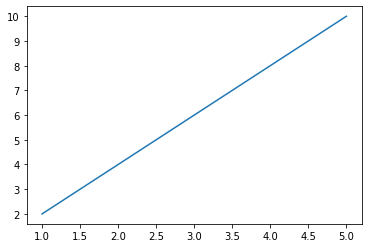

In [3]:
x = np.array([1, 2, 3, 4, 5])
y = x * 2
plt.plot(x, y)
plt.show()